# PromptSmooth:
### Certifying Robustness of Medical Vision-Language Models via Prompt Learning
Reproduction Points: 10

Medical Vision-Language Models (Med-VLMs) have demonstrated significant potential in improving medical imaging tasks such as detection, segmentation, and classification. However, there are serious hazards in safety-critical fields like healthcare due to their vulnerability to adversarial assaults, which inject minor perturbations to disrupt predictions. For large-scale medical datasets, existing certified defenses like randomized smoothing are computationally expensive and impracticable since they frequently require retraining on noise-augmented datasets or custom denoisers. The challenge is in maintaining clean accuracy and avoiding computational cost while attaining effective verified robustness for Med-VLMs.
The paper introduces a novel framework that leverages prompt learning to achieve certified robustness for Med-VLMs against adversarial attacks. PromptSmooth enables Med-VLMs to adjust to Gaussian noise without retraining or compromising their clean accuracy by introducing learnable prompts into the model's input space. The method is very effective and suitable for medical imaging scenarios with limited data because it is made to function in both zero-shot and few-shot circumstances. Numerous tests show that PromptSmooth can sustain reliable forecasts in the face of adversarial perturbations and a range of noise levels.

Repo: https://github.com/nhussein/promptsmooth

# Concepts Involved:
PromptSmooth consists of two main components:

**Zero-Shot PromptSmooth:** This setting uses a single test sample with no labeled data to optimize prompts during testing. The method ensures consistent predictions in adversarial situations by minimizing entropy across noisy perturbations.\
**Few-Shot PromptSmooth:** This variant fine-tunes the prompts using a small labeled subset from the target dataset. By aligning prompts with noisy sample distributions, this approach achieves higher certified accuracy at lower perturbation radii.\

Both approaches rely on randomized smoothing, where Gaussian noise is added to the input during inference, and the model's predictions are averaged to certify robustness. The framework ensures efficient adaptation by keeping the Med-VLM backbone frozen while only updating the learnable prompts, significantly reducing computational costs compared to traditional methods.

## Steps involved:
1) Environment and directory setup
2) Download Test datasets and Pretrained model
3) Run ZeroShot PLIP, Zeroshot Promptsmooth and Fewshot Promptsmooth for various noise levels (0.1, 0.25, 0.5, 1.0)

# Environment Setup

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
!git clone https://github.com/nhussein/promptsmooth.git

Cloning into 'promptsmooth'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 314 (delta 66), reused 34 (delta 34), pack-reused 224 (from 2)
Receiving objects: 100% (314/314), 6.98 MiB | 31.63 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [3]:
!conda create -n promptsmooth python=3.8 pip

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.1.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/promptsmooth

  added / updated specs:
    - pip
    - python=3.8


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    liblzma-devel-5.6.3        |       hb9d3cd8_1         368 KB  conda-forge
    libsqlite-3.48.0           |       hee588c1_1         858 KB  conda-forge
    pip-24.3.1                 |     pyh8b19718_0         1.2 MB  conda-forge
    python-3.8.20              |h4a871b0_2_cpython        21.1 MB  conda-forge
    setuptools-75.3.0          |     pyhd8ed1ab_0         761 KB  conda-forge
    wheel-0.45.1               |     pyhd8ed1ab_0          62 KB  c

In [ ]:
!source activate promptsmooth && pip install -r promptsmooth/requirements.txt

  Cloning https://github.com/fra31/auto-attack (to revision a39220048b3c9f2cca9a4d3a54604793c68eca7e) to /tmp/pip-install-41g6vbic/autoattack_647382b7e8a94687bc973a881b192319
  Running command git clone --filter=blob:none --quiet https://github.com/fra31/auto-attack /tmp/pip-install-41g6vbic/autoattack_647382b7e8a94687bc973a881b192319
  Running command git rev-parse -q --verify 'sha^a39220048b3c9f2cca9a4d3a54604793c68eca7e'
  Running command git fetch -q https://github.com/fra31/auto-attack a39220048b3c9f2cca9a4d3a54604793c68eca7e
  Resolved https://github.com/fra31/auto-attack to commit a39220048b3c9f2cca9a4d3a54604793c68eca7e
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git (to revision a1d071733d7111c9c014f024669f959182114e33) to /tmp/pip-install-41g6vbic/clip_40ef377f869947b98fdf65e050fcd8fc
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-41g6vbic/clip_40ef377f869947b98fdf65e050fcd8fc
  

## Directory Setup
- The Pretrained model can be downloaded from: https://drive.google.com/file/d/1zwreSf0IYuTNJoLVymXJCEGWeEKUiWmi/view?usp=sharing
- The dataset can be downloaded from: https://drive.google.com/file/d/19v3p2b06o67TNENES_o1RgD9e3tT9Fk3/view?usp=sharing

Note: 
- The corresponding Download and directory scipt has been provided

In [5]:
# Pretrained Model
!gdown https://drive.google.com/uc?id=1zwreSf0IYuTNJoLVymXJCEGWeEKUiWmi
!unzip /content/pretrained_weights.zip -d /content/promptsmooth/

# # Data Subset
!gdown https://drive.google.com/uc?id=19v3p2b06o67TNENES_o1RgD9e3tT9Fk3
!unzip /content/subsets.zip -d /content/promptsmooth/


Streaming output truncated to the last 5000 lines.
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-194.png  
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-196.png  
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-1960.png  
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-1962.png  
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-1979.png  
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-1984.png  
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-1990.png  
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-2010.png  
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-2020.png  
  inflating: /content/promptsmooth/subsets/COVID19_500subset/images/test/covid/COVID-20

In [6]:
%cd promptsmooth

/content/promptsmooth


In [7]:
!mkdir certification_output

## Test Runs

Since each test run for each noise level takes about 1 to 1.5 hours, the runs were executed on separate GPU enabled system, the generated outputs are pasted here as text

Following changes are required to run the testing script on the repo:\
1) Incorrect model location in /content/promptsmooth/clip_tpt/custom_plip.py\
2) The model path needs to be manually edited in the certify_zeroshot_plip.py and certify_promptsmooth_plip.py

### Run for ZeroShot PLIP

In [ ]:
# ZeroShot PLIP with noise level 0.1
!source activate promptsmooth && python certify_zeroshot_plip.py --outfile certification_output/zero_plip --sigma 0.1

Total accuracy is 56.599999999999994 against radii 0\
Total accuracy is 49.2 against radii 0.1\
Total accuracy is 38.0 against radii 0.25\
Total accuracy is 0.0 against radii 0.5\
Total accuracy is 0.0 against radii 0.75\
Total accuracy is 0.0 against radii 1\
Total accuracy is 0.0 against radii 1.25\
Total accuracy is 0.0 against radii 1.5\
Total accuracy is 0.0 against radii 1.75\
Total accuracy is 0.0 against radii 2

In [ ]:
# ZeroShot PLIP with noise level 0.25
!source activate promptsmooth && python certify_zeroshot_plip.py --outfile certification_output/zero_plip --sigma 0.25

Total accuracy is 28.999999999999996 against radii 0\
Total accuracy is 27.0 against radii 0.1\
Total accuracy is 23.599999999999998 against radii 0.25\
Total accuracy is 20.8 against radii 0.5\
Total accuracy is 17.4 against radii 0.75\
Total accuracy is 0.0 against radii 1\
Total accuracy is 0.0 against radii 1.25\
Total accuracy is 0.0 against radii 1.5\
Total accuracy is 0.0 against radii 1.75\
Total accuracy is 0.0 against radii 2

In [ ]:
# ZeroShot PLIP with noise level 0.5
!source activate promptsmooth && python certify_zeroshot_plip.py --outfile certification_output/zero_plip --sigma 0.5

Total accuracy is 11.0 against radii 0\
Total accuracy is 11.0 against radii 0.1\
Total accuracy is 11.0 against radii 0.25\
Total accuracy is 11.0 against radii 0.5\
Total accuracy is 11.0 against radii 0.75\
Total accuracy is 11.0 against radii 1\
Total accuracy is 11.0 against radii 1.25\
Total accuracy is 11.0 against radii 1.5\
Total accuracy is 0.0 against radii 1.75\
Total accuracy is 0.0 against radii 2

In [ ]:
# ZeroShot PLIP with noise level 1.0
!source activate promptsmooth && python certify_zeroshot_plip.py --outfile certification_output/zero_plip --sigma 1.0

Total accuracy is 11.0 against radii 0\
Total accuracy is 11.0 against radii 0.1\
Total accuracy is 11.0 against radii 0.25\
Total accuracy is 11.0 against radii 0.5\
Total accuracy is 11.0 against radii 0.75\
Total accuracy is 11.0 against radii 1\
Total accuracy is 11.0 against radii 1.25\
Total accuracy is 11.0 against radii 1.5\
Total accuracy is 11.0 against radii 1.75\
Total accuracy is 11.0 against radii 2

## Run for ZeroShot PromptSmooth


In [ ]:
#ZeroShot Promptsmooth with noise level 0.1
!source activate promptsmooth && python certify_promptsmooth_plip.py --n 500 --dataset kather --zeroshot True --sigma 0.1 --arch ViT-B/32 --outfile certification_output/PromptSmooth/ZeroShot --load /content/promptsmooth/pretrained_weights/fewshot_weights/kather_plip/PromptSmooth/vit_b32_ep50_16shots/nctx5_cscFalse_ctpend/seed1/prompt_learner/model.pth.tar-50

Total accuracy is 57.4 against radii 0\
Total accuracy is 53.400000000000006 against radii 0.1\
Total accuracy is 49.4 against radii 0.25\
Total accuracy is 0.0 against radii 0.5\
Total accuracy is 0.0 against radii 0.75\
Total accuracy is 0.0 against radii 1\
Total accuracy is 0.0 against radii 1.25\
Total accuracy is 0.0 against radii 1.5\
Total accuracy is 0.0 against radii 1.75\
Total accuracy is 0.0 against radii 2\
Total accuracy is 0.0 against radii 2.5

In [ ]:
#ZeroShot Promptsmooth with noise level 0.25
!source activate promptsmooth && python certify_promptsmooth_plip.py --n 500 --dataset kather --zeroshot True --sigma 0.25 --arch ViT-B/32 --outfile certification_output/PromptSmooth/ZeroShot --load /content/promptsmooth/pretrained_weights/fewshot_weights/kather_plip/PromptSmooth/vit_b32_ep50_16shots/nctx5_cscFalse_ctpend/seed1/prompt_learner/model.pth.tar-50

Total accuracy is 35.199999999999996 against radii 0\
Total accuracy is 33.0 against radii 0.1\
Total accuracy is 30.4 against radii 0.25\
Total accuracy is 26.6 against radii 0.5\
Total accuracy is 21.6 against radii 0.75\
Total accuracy is 0.0 against radii 1\
Total accuracy is 0.0 against radii 1.25\
Total accuracy is 0.0 against radii 1.5\
Total accuracy is 0.0 against radii 1.75\
Total accuracy is 0.0 against radii 2\
Total accuracy is 0.0 against radii 2.5

In [ ]:
#ZeroShot Promptsmooth with noise level 0.5
!source activate promptsmooth && python certify_promptsmooth_plip.py --n 500 --dataset kather --zeroshot True --sigma 0.5 --arch ViT-B/32 --outfile certification_output/PromptSmooth/ZeroShot --load /content/promptsmooth/pretrained_weights/fewshot_weights/kather_plip/PromptSmooth/vit_b32_ep50_16shots/nctx5_cscFalse_ctpend/seed1/prompt_learner/model.pth.tar-50

Total accuracy is 20.200000000000003 against radii 0\
Total accuracy is 19.400000000000002 against radii 0.1\
Total accuracy is 18.8 against radii 0.25\
Total accuracy is 16.6 against radii 0.5\
Total accuracy is 15.2 against radii 0.75\
Total accuracy is 14.000000000000002 against radii 1\
Total accuracy is 12.6 against radii 1.25\
Total accuracy is 11.799999999999999 against radii 1.5\
Total accuracy is 0.0 against radii 1.75\
Total accuracy is 0.0 against radii 2\
Total accuracy is 0.0 against radii 2.5


In [ ]:
#ZeroShot Promptsmooth with noise level 1.0
!source activate promptsmooth && python certify_promptsmooth_plip.py --n 500 --dataset kather --zeroshot True --sigma 1.0 --arch ViT-B/32 --outfile certification_output/PromptSmooth/ZeroShot --load /content/promptsmooth/pretrained_weights/fewshot_weights/kather_plip/PromptSmooth/vit_b32_ep50_16shots/nctx5_cscFalse_ctpend/seed1/prompt_learner/model.pth.tar-50

Total accuracy is 7.199999999999999 against radii 0\
Total accuracy is 7.000000000000001 against radii 0.1\
Total accuracy is 6.4 against radii 0.25\
Total accuracy is 5.4 against radii 0.5\
Total accuracy is 5.0 against radii 0.75\
Total accuracy is 4.2 against radii 1\
Total accuracy is 3.8 against radii 1.25\
Total accuracy is 3.2 against radii 1.5\
Total accuracy is 3.0 against radii 1.75\
Total accuracy is 2.8000000000000003 against radii 2\
Total accuracy is 1.2 against radii 2.5

## Run for FewShot PromptSmooth

In [ ]:
#FewShot Promptsmooth with noise level 0.1
!source activate promptsmooth && python certify_promptsmooth_plip.py --n 500 --dataset kather --fewshot True --sigma 0.1 --arch ViT-B/32 --outfile certification_output/PromptSmooth/FewShot --load /content/promptsmooth/pretrained_weights/fewshot_weights/kather_plip/PromptSmooth/vit_b32_ep50_16shots/nctx5_cscFalse_ctpend/seed1/prompt_learner/model.pth.tar-50

Total accuracy is 81.2 against radii 0\
Total accuracy is 78.0 against radii 0.1\
Total accuracy is 67.80000000000001 against radii 0.25\
Total accuracy is 0.0 against radii 0.5\
Total accuracy is 0.0 against radii 0.75\
Total accuracy is 0.0 against radii 1\
Total accuracy is 0.0 against radii 1.25\
Total accuracy is 0.0 against radii 1.5\
Total accuracy is 0.0 against radii 1.75\
Total accuracy is 0.0 against radii 2\
Total accuracy is 0.0 against radii 2.5


In [ ]:
#FewShot Promptsmooth with noise level 0.25
!source activate promptsmooth && python certify_promptsmooth_plip.py --n 500 --dataset kather --fewshot True --sigma 0.25 --arch ViT-B/32 --outfile certification_output/PromptSmooth/FewShot --load /content/promptsmooth/pretrained_weights/fewshot_weights/kather_plip/PromptSmooth/vit_b32_ep50_16shots/nctx5_cscFalse_ctpend/seed1/prompt_learner/model.pth.tar-50

Total accuracy is 75.4 against radii 0\
Total accuracy is 70.8 against radii 0.1\
Total accuracy is 65.0 against radii 0.25\
Total accuracy is 51.800000000000004 against radii 0.5\
Total accuracy is 36.0 against radii 0.75\
Total accuracy is 0.0 against radii 1\
Total accuracy is 0.0 against radii 1.25\
Total accuracy is 0.0 against radii 1.5\
Total accuracy is 0.0 against radii 1.75\
Total accuracy is 0.0 against radii 2\
Total accuracy is 0.0 against radii 2.5

In [ ]:
#FewShot Promptsmooth with noise level 1.0
!source activate promptsmooth && python certify_promptsmooth_plip.py --n 500 --dataset kather --fewshot True --sigma 1.0 --arch ViT-B/32 --outfile certification_output/PromptSmooth/FewShot --load /content/promptsmooth/pretrained_weights/fewshot_weights/kather_plip/PromptSmooth/vit_b32_ep50_16shots/nctx5_cscFalse_ctpend/seed1/prompt_learner/model.pth.tar-50

Total accuracy is 24.35129740518962 against radii 0.1\
Total accuracy is 21.956087824351297 against radii 0.25\
Total accuracy is 19.760479041916167 against radii 0.5\
Total accuracy is 17.16566866267465 against radii 0.75\
Total accuracy is 14.171656686626747 against radii 1\
Total accuracy is 11.776447105788424 against radii 1.25\
Total accuracy is 9.780439121756487 against radii 1.5\
Total accuracy is 7.584830339321358 against radii 1.75\
Total accuracy is 0.998003992015968 against radii 2\
Total accuracy is 0.19960079840319359 against radii 2.5

# Result Analysis
Although the Certified Accuracy values are slightly lower, they stay within the same range, the MAX values calculated for each noise level and L2 radius are in fairly good agreement with the values given in the paper. This approach effectively showcases the best-case performance of the model, highlighting its robustness potential under optimal conditions.
However, while this method of analysis is valid for emphasizing the model's maximum capabilities, it might not be the most appropriate way to evaluate the overall performance. Strictly paying attention to the MAX values ignores the model's generalizability and consistency across all noise levels, which are essential for practical applications.  A more accurate assessment of the model's performance would take into account the trade-offs across different noise levels.

| Method Used             | Noise | 0    | 0.1  | 0.25 | 0.5  | 0.75 | 1    | 1.25 | 1.5  |
|-------------------------|-------|------|------|------|------|------|------|------|------|
| ZeroShot               | 0.1   | 56.6 | 49.2 | 38   | 0    | 0    | 0    | 0    | 0    |
| ZeroShot               | 0.25  | 29   | 27   | 23.6 | 20.8 | 17.4 | 0    | 0    | 0    |
| ZeroShot               | 0.5   | 11   | 11   | 11   | 11   | 11   | 11   | 11   | 11   |
| ZeroShot               | 1     | 11   | 11   | 11   | 11   | 11   | 11   | 11   | 11   |
| ZeroShot PromptSmooth  | 0.1   | 57.4 | 53.4 | 49   | 0    | 0    | 0    | 0    | 0    |
| ZeroShot PromptSmooth  | 0.25  | 35.2 | 33   | 30.4 | 26.6 | 21.6 | 0    | 0    | 0    |
| ZeroShot PromptSmooth  | 0.5   | 20.2 | 19.4 | 18.8 | 16.6 | 15.2 | 14   | 12.6 | 11.8 |
| ZeroShot PromptSmooth  | 1     | 7.2  | 7    | 6.4  | 5.4  | 5    | 4.2  | 3.8  | 3.2  |
| FewShot PromptSmooth   | 0.1   | 81.2 | 78   | 67.8 | 0    | 0    | 0    | 0    | 0    |
| FewShot PromptSmooth   | 0.25  | 75.4 | 70.8 | 65   | 51.8 | 36   | 0    | 0    | 0    |
| FewShot PromptSmooth   | 1     | 24.4 | 21.9 | 19.7 | 17.2 | 14.2 | 11.8 | 9.8  | 7.6  |
|**ZeroShot**            | Max   | 56.6 | 49.2 | 38   | 20.8 | 17.4 | 11   | 11   | 11   |
| **ZeroShot PromptSmooth** | Max   | 57.4 | 53.4 | 49   | 26.6 | 21.6 | 14   | 12.6 | 11.8 |
|**FewShot PromptSmooth** | Max   | 81.2 | 78   | 67.8 | 51.8 | 36   | 11.8 | 9.8  | 7.6  |

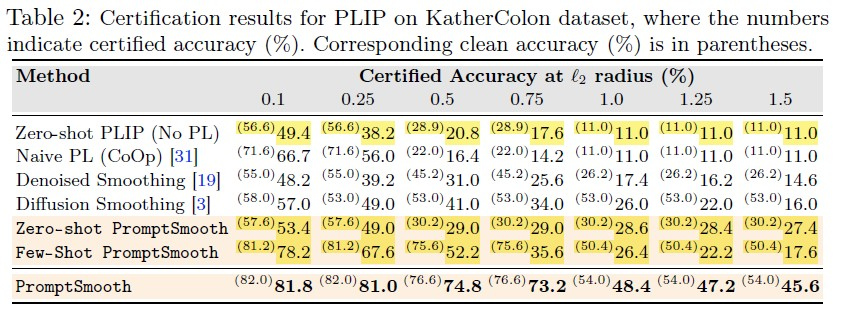

In [1]:
# prompt: print image /content/promptsmooth_comp_table.jpg

from IPython.display import Image
Image('/content/promptsmooth_comp_table.jpg')


# Conclusion
PromptSmooth introduces an effective prompt learning-based methodology, which is a major step forward in certifying robustness for Med-VLMs. It is especially well-suited for medical applications with little data because of its flexibility in zero-shot and few-shot scenarios. The method ensures practicality for real-world deployment by achieving state-of-the-art outcomes while minimizing computing overhead. While the method effectively highlights the model's robustness potential, future work could focus on evaluating its consistency across different noise levels and optimizing its application to larger-scale datasets and complex adversarial scenarios. Overall, PromptSmooth offers a scalable and effective solution to improve Med-VLMs' safety and reliability in critical medical tasks.